# Instructions

This assessment concerns the well-known tips dataset and the Python packages seaborn and jupyter. The project is broken into three parts, as follows:

1. **Description**: Create a git repository and make it available online for the lecturer to clone. The repository should contain all your work for this assessment. Within the repository, create a jupyter notebook that uses descriptive statistics and plots to describe the tips dataset.

2. **Regression**: To the above jupyter notebook add a section that discusses and analyses whether there is a relationship between the total bill and tip amount.

3. **Analyse**: Again using the same notebook, analyse the relationship between the variables within the dataset. You are free to interpret this as you wish — for example, you may analyse all pairs of variables, or select a subset and analyse those.

In [1]:
# Show plots in notebook.
%matplotlib inline

In [2]:
# Import packages.
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the color palette
sns.set_palette("Set2")

# Part 1. Description

In this assessment, I work with the tips dataset which is inbuild in a seaborn package. The data is this dataset were recorded in a restaurant in US by a food server on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and offered to seat in a non-smoking section to patrons who requested it.

Let's load the tips dataset and see the summary statistic of the dataset.

In [3]:
# Load the tips dataset which is part of the seaborn package.
tips = sns.load_dataset("tips")

In [4]:
# Show the tips dataset.
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


We can see that tips dataset has 244 rows and 7 columns:

* total_bill- cost of the meal including tax, in US dollars
* tip- gratuity in US dollars
* sex- sex of person paying for the meal (male or female)
* smoker- smoker in party (no or yes)
* day- day of the week (Thursday, Friday, Saturday, Sunday)
* time- night or day (dinner or lunch)
* size- size of the party (from 1 to 6)

We can see that sex, smoker, day and time are categorical data. And total_bill, tip, and size are numerical data.

In [5]:
# Returns the number of Males and Females.
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [6]:
# Returns the number of parties with Non smokers and Smokers.
tips.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [7]:
# Returns the number of parties during Dinner time and Lunch time.
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [8]:
# Returns the number of parties on different days.
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [9]:
# Returns the size of the party and number of parties.
tips['size'].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

In [10]:
# Returns the sum of total_bill.
tips.total_bill.sum()

4827.77

In [11]:
# Returns the sum of tips.
tips.tip.sum()

731.5799999999999

In [12]:
# Returns the sum of party size.
tips.size.sum()

1708

In the dataset, there is:
* 157 Males and 87 Females paying for the bill.
* 151 parties with non smokers and 93 with smokers.
* 176 parties during Dinner time and 68 parties during Lunch time.
* 62 parties on Thursday, 19 on Friday, 87 on Saturday and 76 on Sunday.
* 4 parties of 1, 156 parties of 2, 38 parties of 3, 37 parties of 4, 5 parties of 5 and 4 parties of 6. 
* Visitors paid 4827.77 in total bills.
* Visitors paid 731. 58 in tips.
* 1708 people visited the restaurant.

In [13]:
# Returns summary statistics of the dataset.
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


We have 244 values in each numerical column, so no values are missing. 
* The minimum value of total_bill is 3.07, the average value is 19.79 and the maximum value is 50.81. The standard deviation is 8.90 so the values are not close to the mean but are spread out over a wider range.  
* The minimum value of tip is 1, the average value is 3 and the maximum value is 10. The standard deviation is 1.38 so the values are close to mean.
* The minimum value of size is 1, the average value is 2.57 and the maximum value is 6. The standard deviation is 0.95 so the values are close to mean.

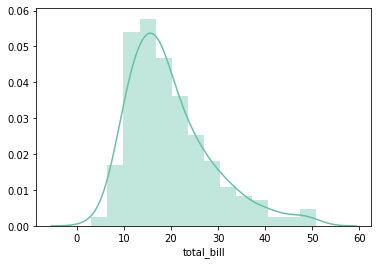

In [14]:
# Returns a plot of total_bill.
sns.distplot(tips.total_bill)

From the image above we can see that most of the total_bill paid by the customers are around 20.

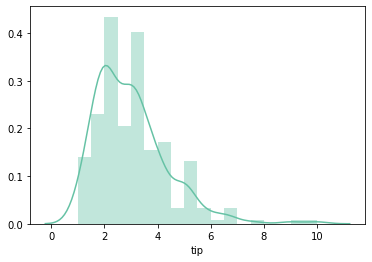

In [15]:
# Returns a plot of tip.
sns.distplot(tips.tip)

From the image above we can see that most of the tips given by the customers lie between the range of 2 and 4.

In [16]:
# Returns summary statistics of the dataset only for Females.
(tips.loc[tips.loc[:, 'sex'] == 'Female']).describe()

,total_bill,tip,size
count,87.000000,87.000000,87.000000
mean,18.056897,2.833448,2.459770
std,8.009209,1.159495,0.937644
min,3.070000,1.000000,1.000000
25%,12.750000,2.000000,2.000000
50%,16.400000,2.750000,2.000000
75%,21.520000,3.500000,3.000000
max,44.300000,6.500000,6.000000


We have 87 values in each numerical column for the value Female in the column sex.

* The minimum value of total_bill is 3.07, the average value is 18.06 and the maximum value is 44.3. The standard deviation is 8 so the values are not close to the mean but are spread out over a wider range.
* The minimum value of tip is 1, the average value is 2.83 and the maximum value is 6.5. The standard deviation is 1.16 so the values are close to mean.
* The minimum value of size is 1, the average value is 2.46 and the maximum value is 6. The standard deviation is 0.94 so the values are close to mean.

In [17]:
# Returns summary statistics of the dataset only for Males.
(tips.loc[tips.loc[:, 'sex'] == 'Male']).describe()

,total_bill,tip,size
count,157.000000,157.000000,157.000000
mean,20.744076,3.089618,2.630573
std,9.246469,1.489102,0.955997
min,7.250000,1.000000,1.000000
25%,14.000000,2.000000,2.000000
50%,18.350000,3.000000,2.000000
75%,24.710000,3.760000,3.000000
max,50.810000,10.000000,6.000000


We have 157 values in each numerical column for the value Male in the column sex.

* The minimum value of total_bill is 7.25, the average value is 20.74 and the maximum value is 50.81. The standard deviation is 9.25 so the values are not close to the mean but are spread out over a wider range.
* The minimum value of tip is 1, the average value is 3.09 and the maximum value is 10. The standard deviation is 1.49 so the values are close to mean.
* The minimum value of size is 1, the average value is 2.63 and the maximum value is 6. The standard deviation is 0.96 so the values are close to mean.

In [18]:
# Returns numbers of entries in each column divided by sex, smoker, day and time. 
tips.groupby(['sex', 'smoker', 'day', 'time']).size()

sex     smoker  day   time  
Male    Yes     Thur  Lunch     10
                Fri   Lunch      3
                      Dinner     5
                Sat   Dinner    27
                Sun   Dinner    15
        No      Thur  Lunch     20
                Fri   Dinner     2
                Sat   Dinner    32
                Sun   Dinner    43
Female  Yes     Thur  Lunch      7
                Fri   Lunch      3
                      Dinner     4
                Sat   Dinner    15
                Sun   Dinner     4
        No      Thur  Lunch     24
                      Dinner     1
                Fri   Lunch      1
                      Dinner     1
                Sat   Dinner    13
                Sun   Dinner    14
dtype: int64

Males in party with Smokers were the most often paying on Saturday during the Dinner time and in party with No smokers on Sunday during the Dinner time. Females in party with Smokers were the most often paying on Saturday during the Dinner time and in party with No smokers on Thursday during the Lunch time.

# Part 2. Regression

Linear Regression is one of the most fundamental and widely used Machine Learning Algorithms. It’s usually among the first few topics which people pick while learning predictive modeling. 

In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. 

Linear relationships can either be positive or negative. A positive relationship between two variables basically means that an increase in the value of one variable also implies an increase in the value of the other variable. A negative relationship between two variables means that an increase in the value of one variable implies a decrease in the value of the other variable.

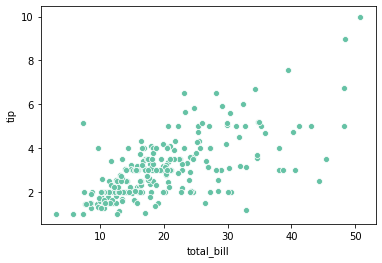

In [19]:
# Create the scatterplot.
sns.scatterplot(x = "total_bill", y = "tip", data = tips)

The scatter plot is a mainstay of statistical visualization. It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset.

It looks like there is a positive relationship between the total_bill and tip, because when the total_bill increases, the tip increases as well.

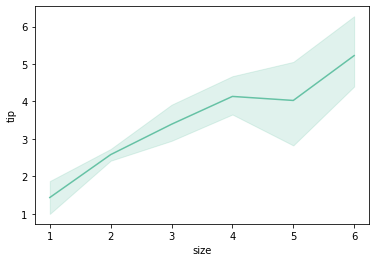

In [20]:
# Create the lineplot.
sns.lineplot(x = "size", y = "tip", data = tips)

Lineplot shows the relationship between two variables connected with lines to emphasize continuity.

Again, it looks like there is a positive relationship between the total_bill and tip, because when the total_bill increases, the tip increases as well.

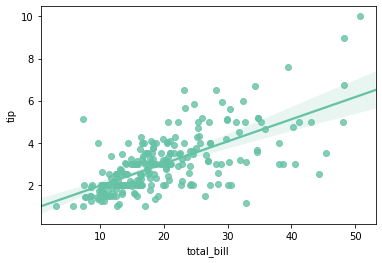

In [21]:
# Create the regplot.
sns.regplot(x = "total_bill", y = "tip", data = tips)

Regplot shows a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression.

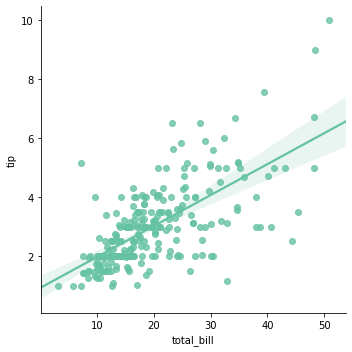

In [22]:
sns.lmplot(x = "total_bill", y = "tip", data = tips)

Lmplot combines regplot() and FacetGrid to plot multiple linear relationships in a dataset.

Both regplot and lmplot look very similar, and they both show a positive relationship between tips and total bill.

# Part 3. Analyse

# References


[Seaborn- An Introduction to seaborn](https://seaborn.pydata.org/introduction.html)

[Towards Data Science- Analyze the data through data visualization using Seaborn](https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e)

[Kaggle- Seaborn tips dataset](https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset)

[Stack Overflow- Difference between groupby and value_counts ](https://stackoverflow.com/a/47495765)

[Stack Overflow- df.groupby('a').size()explained](https://stackoverflow.com/a/38703649)

[Seborn- Distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

[Analytics India Magazine- Introduction To Seaborn](https://analyticsindiamag.com/a-simple-introduction-to-pythons-seaborn-library/)

[Medium- Data Visualization with Python and Seaborn](https://medium.com/@neuralnets/data-visualization-with-python-and-seaborn-part-4-9b0119887130)

[Wikipedia- Linear regression](https://en.wikipedia.org/wiki/Linear_regression)

[Acadgild- Linear regression](https://acadgild.com/blog/linear-regression)

[Seaborn- Scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

[Seaborn- Lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot)

[Seaborn- Regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html)

[Seaborn-Lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html)

[Seaborn- Choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)